In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from get_processed_data import get_processed_data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sampling import undersample, oversample, smote, ncr
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [23]:
df4, X_train, y_train, X_val, y_val, X_test, y_test = get_processed_data()

Training set shape: (12335, 55) (12335,)
Validation set shape: (1542, 55) (1542,)
Test set shape: (1542, 55) (1542,)


In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_smote, y_smote = smote(X_train, y_train)
X_over, y_over = oversample(X_train, y_train)
X_under, y_under = undersample(X_train, y_train)
X_smote_scaled = scaler.transform(X_smote)
X_over_scaled = scaler.transform(X_over)
X_under_scaled = scaler.transform(X_under)

```No Sampling```

Lasso Coefficients: [-0.00119412 -0.00222395  0.00254811 -0.00010756  0.00019836  0.0019652
 -0.00028617 -0.00024769 -0.00262895  0.00837765 -0.00169703 -0.00131041
 -0.00109557 -0.00168233 -0.003712    0.00246125  0.00178574 -0.00086804
  0.00044099  0.00463184 -0.00079063 -0.00072932 -0.00459867  0.00128333
 -0.00532793  0.00162643  0.00432124 -0.00122702  0.00111458  0.00357244
 -0.00159236 -0.00738294  0.03955185  0.01752479 -0.00631052 -0.01518828
 -0.00029565 -0.00220088  0.00443649 -0.00040308 -0.00459854 -0.00191671
 -0.00062556 -0.00209667 -0.00280765 -0.00380042 -0.00186032  0.00068078
 -0.00153044  0.00870562 -0.00167545 -0.00240651 -0.04924522  0.01608302
  0.0335242 ]
Accuracy: 0.9332036316472114
Confusion Matrix:
 [[1439    0]
 [ 103    0]]
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


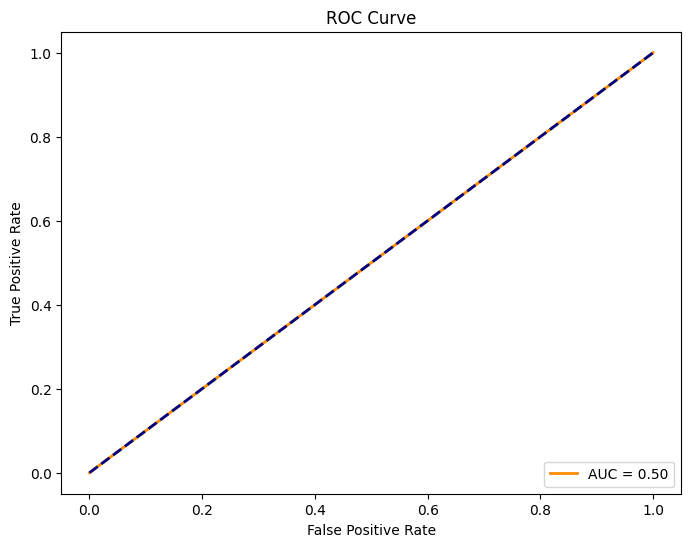

In [25]:
alpha_param = 0.01

# Create and train the Lasso regression model
ridge_model = Ridge(alpha=alpha_param)
ridge_model.fit(X_train_scaled, y_train)

# Print the coefficients
print("Lasso Coefficients:", ridge_model.coef_)

# Predict on the test set
y_pred = ridge_model.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

```SMOTE```

Lasso Coefficients: [-0.00696325 -0.01764533 -0.01109198 -0.19001335 -0.19534932 -0.08788142
 -0.17685408 -0.16045141 -0.20844808 -0.07215142 -0.04838976 -0.0456151
 -0.01230514 -0.02615805 -0.07885561 -0.04662775 -0.03439548 -0.00863349
 -0.02051437 -0.00420529 -0.00664148 -0.00663788 -0.01240557 -0.01491689
 -0.00667466 -0.0104992  -0.00201901 -0.09223126 -0.0610523  -0.00716974
 -0.01993672  0.07520591  0.09031281  0.02137154 -0.02759656 -0.04851933
 -0.01216872 -0.00910511  0.00959455 -0.01219008 -0.00322689 -0.00162205
 -0.01918077 -0.03313367 -0.10265544 -0.01901793 -0.00672069 -0.00480536
 -0.00760074  0.02507788 -0.02156937 -0.0212249  -0.2657046  -0.10696687
 -0.07304399]
Accuracy: 0.9273670557717251
Confusion Matrix:
 [[1423   16]
 [  96    7]]
Precision: 0.30434782608695654
Recall: 0.06796116504854369
F1 Score: 0.11111111111111112


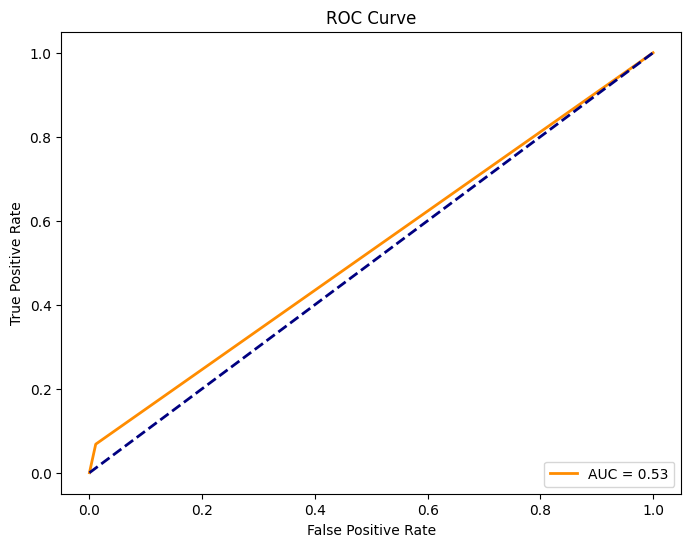

In [26]:
alpha_param = 0.01

# Create and train the Lasso regression model
ridge_model = Ridge(alpha=alpha_param)
ridge_model.fit(X_smote_scaled, y_smote)

# Print the coefficients
print("Lasso Coefficients:", ridge_model.coef_)

# Predict on the test set
y_pred = ridge_model.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

```Over-Sampling```

Lasso Coefficients: [-0.01027783 -0.00533724  0.00822829 -0.00049589  0.00699991  0.0084129
 -0.00129806  0.00082074 -0.00881317  0.02141337 -0.01210444 -0.00628026
 -0.00587486 -0.0124071  -0.01795468  0.00733285  0.00660246 -0.0059501
  0.00106305  0.0038092  -0.00489505 -0.00508112 -0.01041801  0.00815675
 -0.01414066  0.00684588  0.01739506 -0.0081017   0.00785544  0.01071063
 -0.00556935 -0.04377072  0.20957679  0.04329276 -0.02001141 -0.03607374
 -0.00165291 -0.00710668  0.02282467 -0.00222965 -0.00869609 -0.00646533
  0.00349999 -0.00615345  0.00925243 -0.00837252 -0.01104585  0.0105169
 -0.00711395  0.04863012 -0.01552502 -0.00032901 -0.20283459  0.07981561
  0.12354802]
Accuracy: 0.6381322957198443
Confusion Matrix:
 [[890 549]
 [  9  94]]
Precision: 0.14618973561430793
Recall: 0.912621359223301
F1 Score: 0.2520107238605898


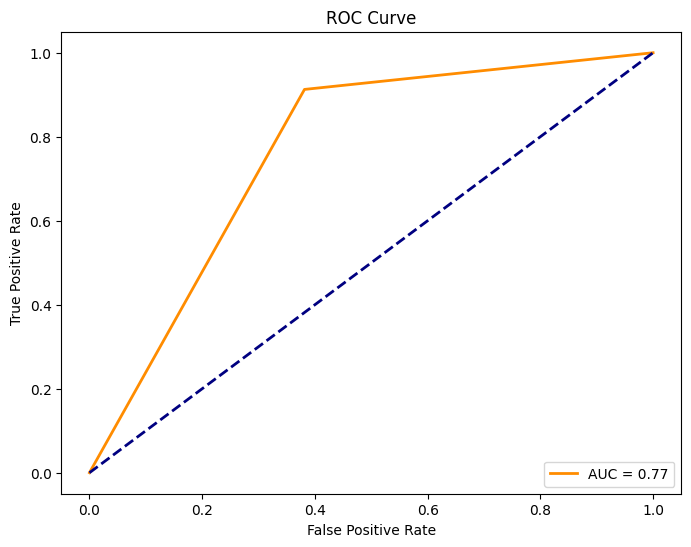

In [27]:
alpha_param = 0.01

# Create and train the Lasso regression model
ridge_model = Ridge(alpha=alpha_param)
ridge_model.fit(X_over_scaled, y_over)


# Print the coefficients
print("Lasso Coefficients:", ridge_model.coef_)

# Predict on the test set
y_pred = ridge_model.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

```Undersampling```

Lasso Coefficients: [-1.54411059e-02 -2.99533254e-03  2.79733841e-03 -1.48059706e-02
 -5.00122681e-03  8.20439854e-03  1.10447199e-02  1.78241552e-02
 -9.02175051e-03  1.92363376e-02 -1.28399104e-02 -9.98099034e-03
 -1.00676549e-02 -2.50040488e-03 -2.06003841e-02  1.38551502e-02
  1.05357005e-02  1.64368271e-29  1.24818401e-02  4.01961246e-03
  1.83424823e-29  1.83424823e-29 -6.47204429e-03  1.10021091e-02
 -1.34115015e-02 -6.15166899e-03  2.07199121e-02 -2.83192164e-03
  5.00670121e-03  2.73237080e-03 -1.65612881e-02 -4.39596193e-02
  1.92879528e-01  4.76087092e-02 -2.31471118e-02 -3.92967531e-02
  1.95720331e-02 -3.27967211e-03  2.37522602e-02 -5.77695051e-03
  5.66130591e-03 -5.57896512e-03 -1.07296282e-02  5.13421119e-04
  5.81267614e-03 -1.17807385e-02 -1.84784614e-02  1.32440433e-02
  2.95074999e-03  4.80812741e-02 -1.39449662e-02 -2.78555060e-03
 -2.01859762e-01  7.49204910e-02  1.27785550e-01]
Accuracy: 0.6446173800259404
Confusion Matrix:
 [[904 535]
 [ 13  90]]
Precision: 0.1

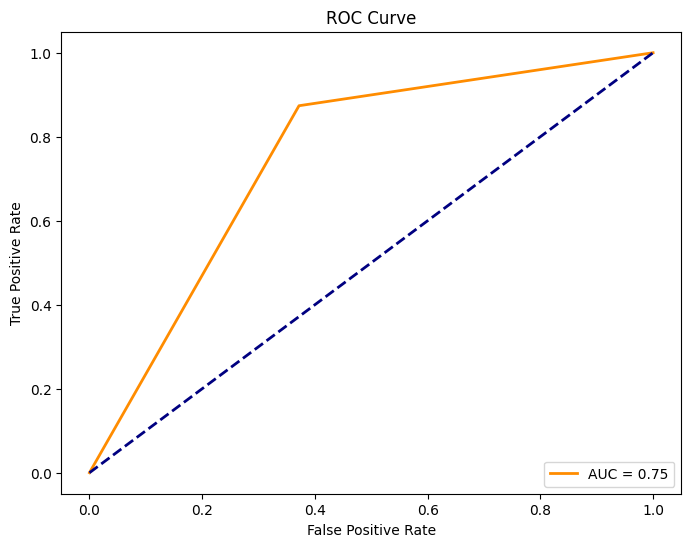

In [28]:
alpha_param = 0.01

# Create and train the Lasso regression model
ridge_model = Ridge(alpha=alpha_param)
ridge_model.fit(X_under_scaled, y_under)

# Print the coefficients
print("Lasso Coefficients:", ridge_model.coef_)

# Predict on the test set
y_pred = ridge_model.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()